# Photochemistry Workshop
## Week 4, Question 4.6

Dr Fiona Dickinson, University of Bath

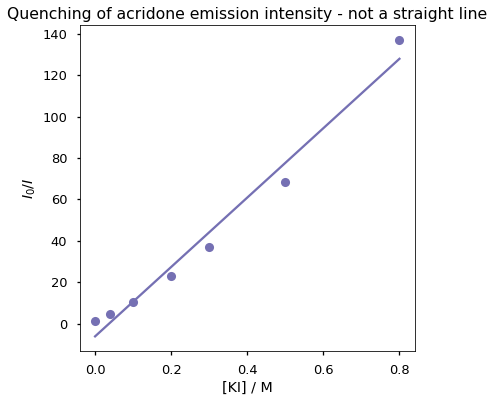

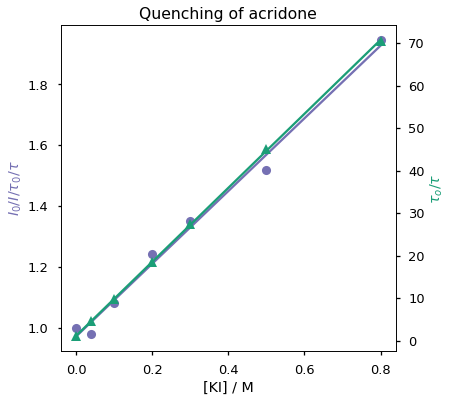

Ks =1.19457491948
kq =4944707820.49 M^-1 s^-1


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#Data from acridone stern volmer - if I was doing this more than once I'd import a .csv

concKI = np.array([0, 0.040, 0.100, 0.200, 0.300, 0.500, 0.800]) #[KI] / M
intensity = np.array([16580, 3753, 1566, 721, 446, 242, 121]) #intensity data
tau = np.array([17.60, 3.90, 1.80, 0.95, 0.64, 0.39, 0.25]) #lifetime data

ratioint =  16580 / intensity #calculating I_0/I for each value

ratiotau = 17.60/tau #calculating tau_0/tau for each value

ratiointtau = ratioint/ratiotau #calculating I_0/I/tau_0/tau for each value - this is because the ratioint plot is curved

#intensity fitting - determining the linear regression to determine the line of best fit for the I_0/I data
intfit = scipy.stats.linregress(concKI, ratioint)
intslope=  (intfit[0])
intint= (intfit[1])
fitint = intslope * concKI + intint


#lifetime fitting - determining the linear regression to determine the line of best fit for the tau_0/tau data
taufit = scipy.stats.linregress(concKI, ratiotau)
tauslope=  (taufit[0])
tauint= (taufit[1])
fittau = tauslope * concKI + tauint

#ratio fitting - determining the linear regression to determine the line of best fit for the I_0/I/tau_0/tau data
ratiofit = scipy.stats.linregress(concKI, ratiointtau)
ratioslope=  (ratiofit[0])
ratioint_tau= (ratiofit[1])
fitratio = ratioslope * concKI + ratioint_tau

sns.set_context('talk') #fancy very quick way to set how the graph looks using seaborn

fig,ax1 = plt.subplots(figsize=(6,6)) #setting the size to square
plt.title('Quenching of acridone emission intensity - not a straight line') #my title doh!
ax1.plot(concKI, ratioint, "o", color='#7570b3') #the data points - just choosing colours which should be good for the colourblind
ax1.plot(concKI, fitint, "-", color='#7570b3') #the fit 
ax1.set_ylabel(r'$I_0/I$') #labelling my axis - I can't remember what the r was for...

plt.savefig('acridonequenchI0I.png',transparent=True)

# ax2 = ax1.twinx()
# ax2.plot(concKI, ratiotau, '^', color='#1b9e77')
# ax2.plot(concKI, fittau, "-", color='#1b9e77')
# ax2.set_ylabel(r'$\tau_o/\tau$')

ax1.set_xlabel('[KI] / M') #no r here...

plt.show() #prints my graph! Oh no it is curved it must be a combination of static and dynamic quenching
#that graph is awful - lets draw some nicer graphs 

fig,ax1 = plt.subplots(figsize=(6,6))
plt.title('Quenching of acridone')
ax1.plot(concKI, ratiointtau, "o", color='#7570b3') #static data points
ax1.plot(concKI, fitratio, "-", color='#7570b3') #static fit
ax1.set_ylabel(r'$I_0/I / \tau_0 / \tau$', color='#7570b3')

ax2 = ax1.twinx()
ax2.plot(concKI, ratiotau, '^', color='#1b9e77') #dynamic data points
ax2.plot(concKI, fittau, "-", color='#1b9e77') #dynamic fit
ax2.set_ylabel(r'$\tau_o/\tau$', color='#1b9e77')

ax1.set_xlabel('[KI] / M')
plt.savefig('acridonequench.png',transparent=True)
plt.show()

print ('Ks =' + str(ratiofit[0])) #static quenching constant - no units as an equilibrium constant - yay for activity
print ('kq =' + str(taufit[0]/(tau[0]*1e-9)) + ' M^-1 s^-1') #dynamic rate constant - this is taking the gradient and multiplying by the value of tau_0
